<a href="https://colab.research.google.com/github/Anushanga2001/Stock_Price_Prediction/blob/main/stock_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction

In [ ]:
# pip install yfinance
# To download the finance data from yahoo finance directory to the python environment

In [ ]:
import yfinance as yf

In [ ]:
from datetime import datetime

# Today date set
end = datetime.now()

# 20 years past data
start = datetime(end.year-20, end.month, end.day)

In [ ]:
# Get ID of company
stock = "GOOG"

# download the data within that time period
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
google_data.head()
# Adj close is more accurate rather than the close value

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512
2004-08-26,2.613952,2.688672,2.606729,2.687676,2.684621,142572401
2004-08-27,2.692408,2.705360,2.632383,2.643840,2.640835,124826132
2004-08-30,2.622171,2.627402,2.540727,2.540727,2.537839,104429967
2004-08-31,2.547950,2.583068,2.544463,2.549693,2.546795,98825037


In [ ]:
# No of Rows and columns
google_data.shape

(5034, 6)

In [ ]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,45.715342,46.199262,45.260178,45.739059,45.689178,1.150942e+08
std,43.854001,44.343028,43.428556,43.893305,43.849716,1.491472e+08
min,2.470490,2.534002,2.464263,2.490913,2.488082,1.584340e+05
25%,13.065340,13.164718,12.914344,13.075677,13.060814,2.722814e+07
50%,27.075665,27.295560,26.870004,27.068434,27.037665,5.478045e+07
75%,60.489750,61.240000,60.169563,60.742250,60.673206,1.417564e+08
max,191.750000,193.309998,190.619995,192.660004,192.660004,1.650833e+09


In [ ]:
# check the data types
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-08-25 to 2024-08-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5034 non-null   float64
 1   High       5034 non-null   float64
 2   Low        5034 non-null   float64
 3   Close      5034 non-null   float64
 4   Adj Close  5034 non-null   float64
 5   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [ ]:
# check the null values in each column
google_data.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
# To draw diagrams
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

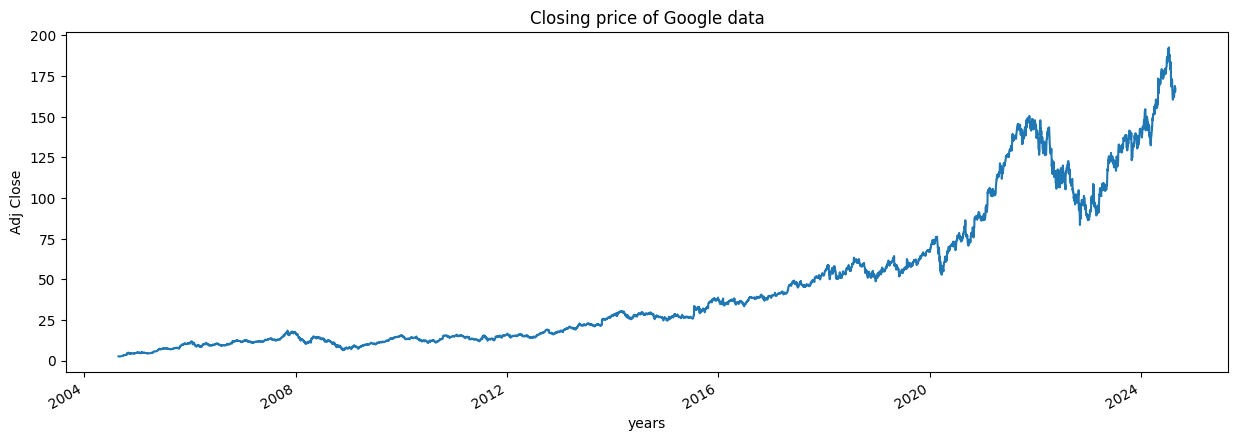

In [ ]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [ ]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [ ]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

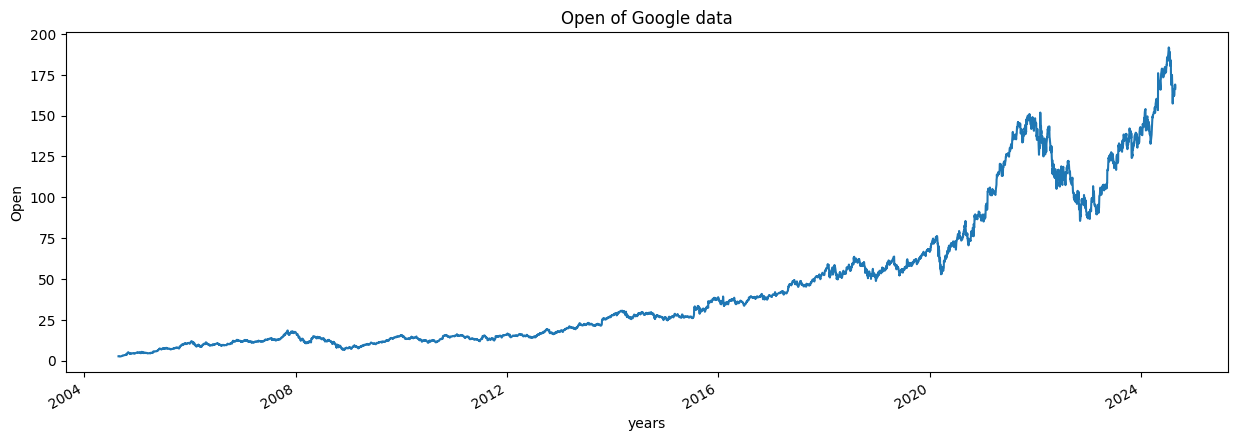

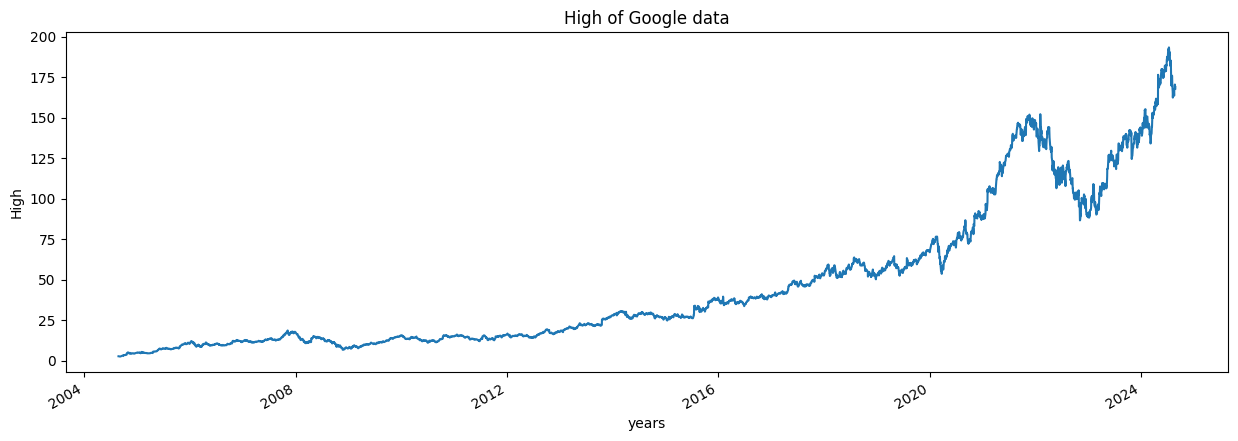

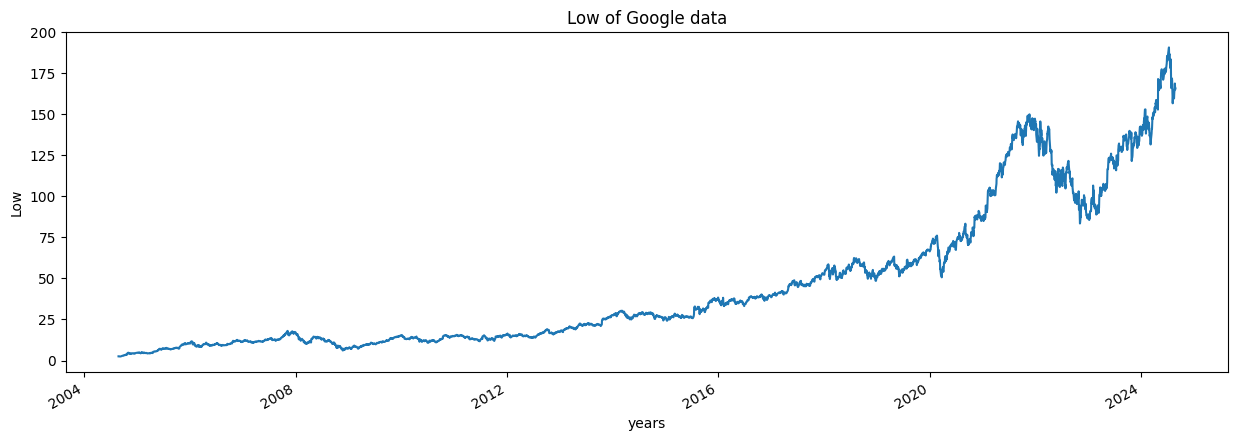

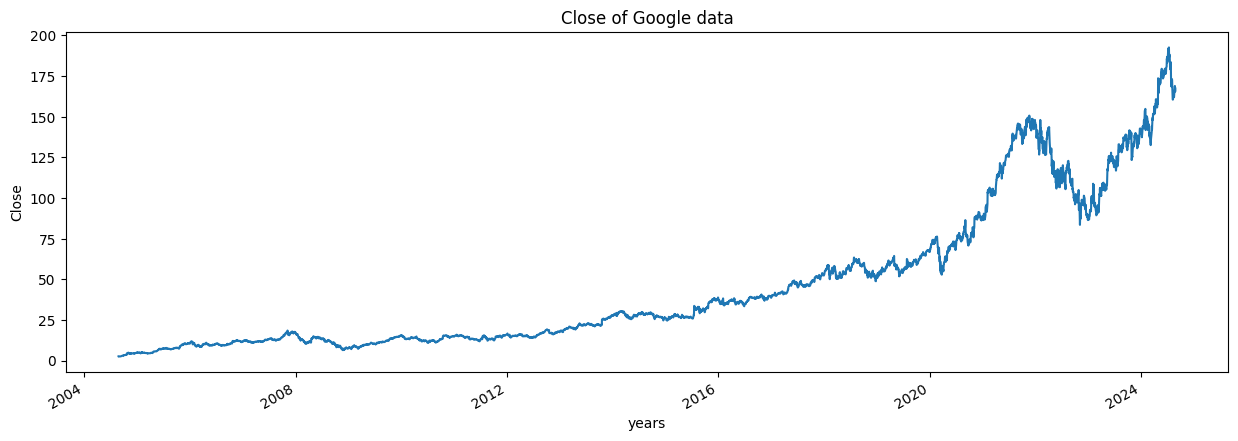

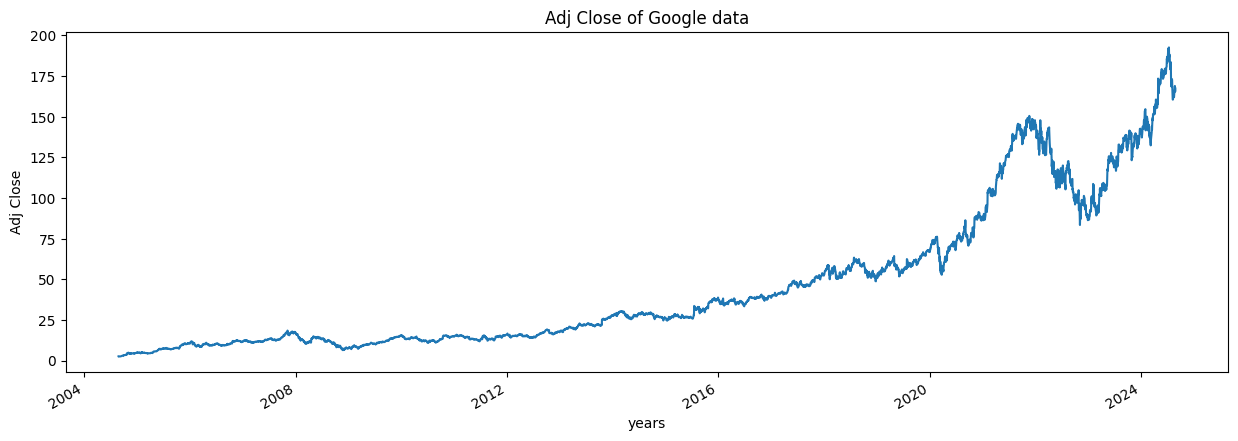

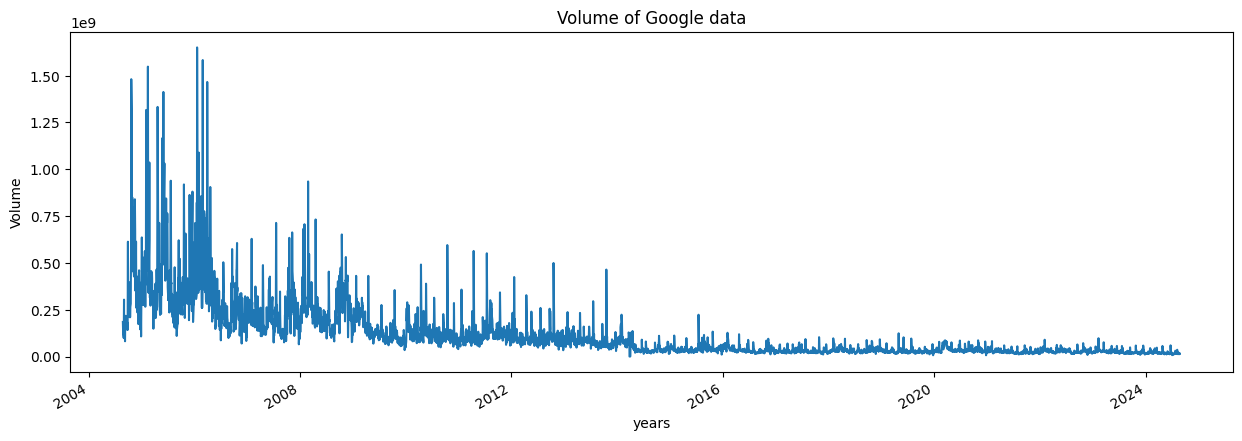

In [ ]:
# According to the time draw the graph for all other columns
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [ ]:
# Moving average method use in here

# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100
# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [ ]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [ ]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [ ]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [ ]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 90
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 163


In [ ]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [ ]:
google_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2005-08-15,NaN
2005-08-16,NaN
2005-08-17,NaN
2005-08-18,NaN
2005-08-19,5.098755


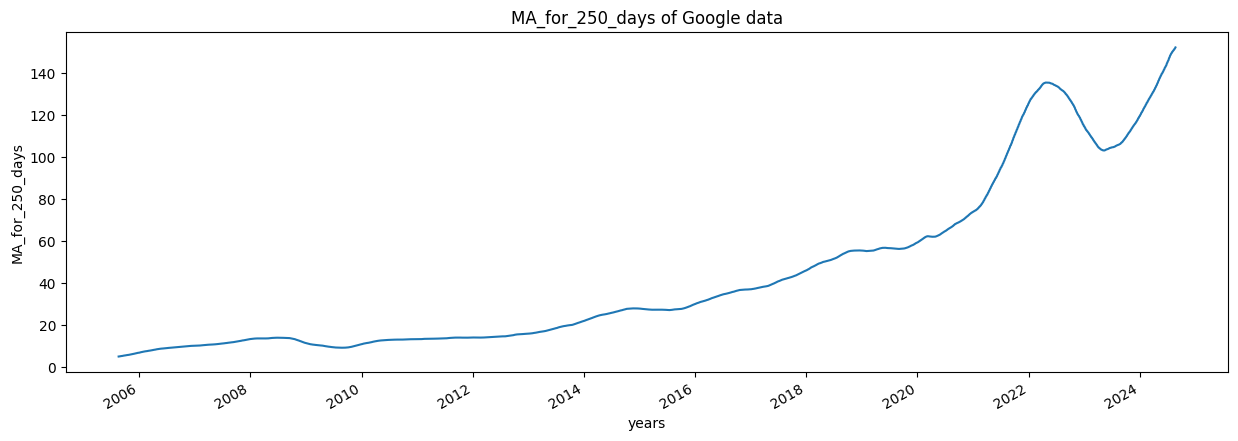

In [ ]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

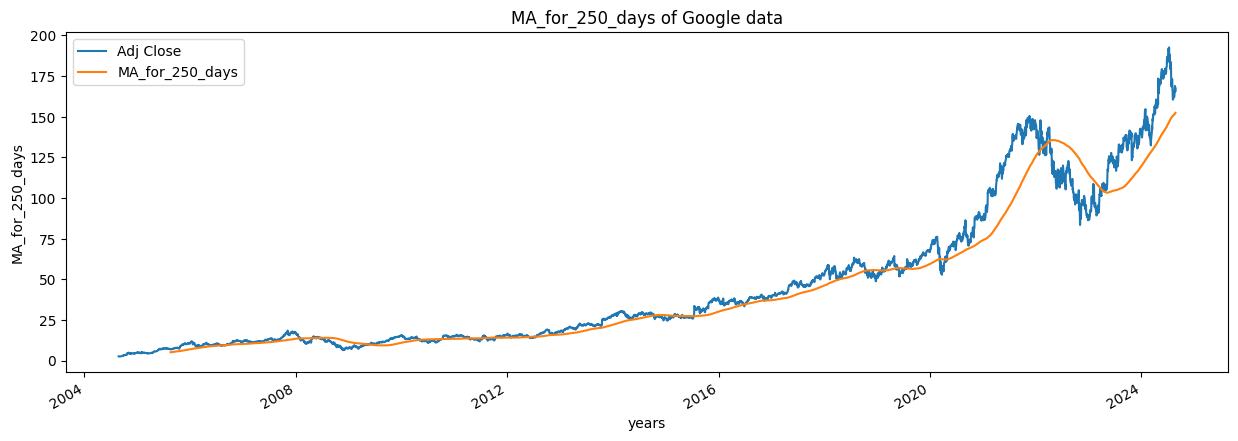

In [ ]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

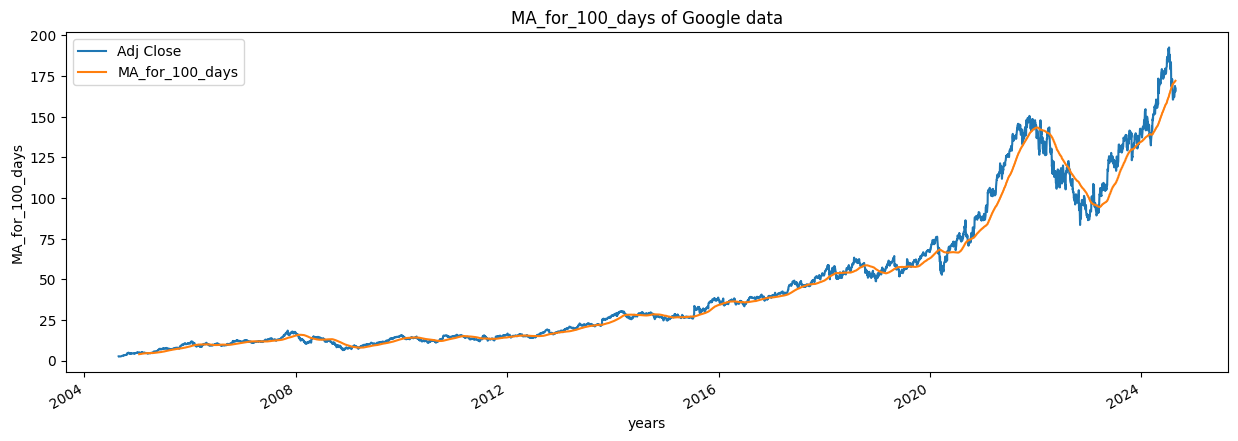

In [ ]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

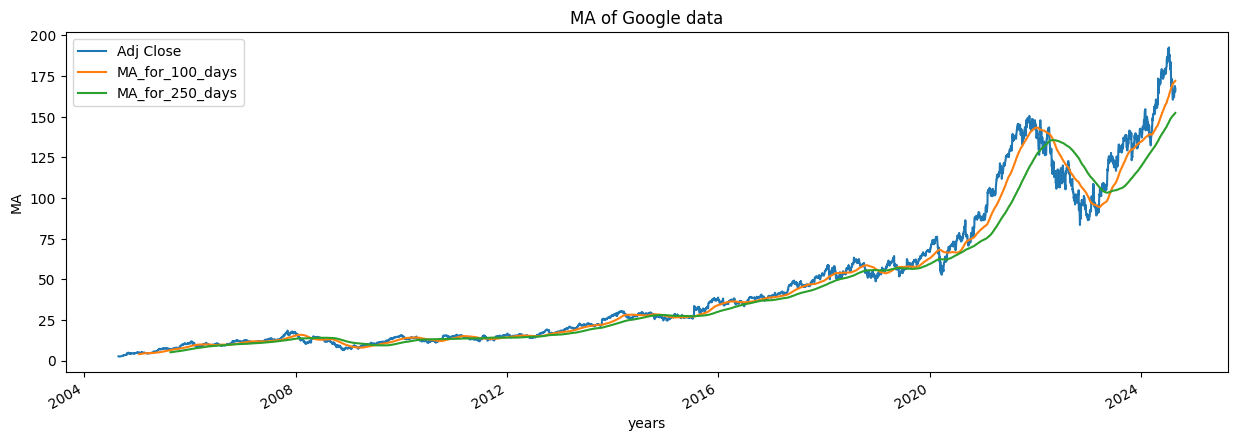

In [ ]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [ ]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-25,2.637103,NaN
2004-08-26,2.684621,0.018019
2004-08-27,2.640835,-0.016310
2004-08-30,2.537839,-0.039001
2004-08-31,2.546795,0.003529


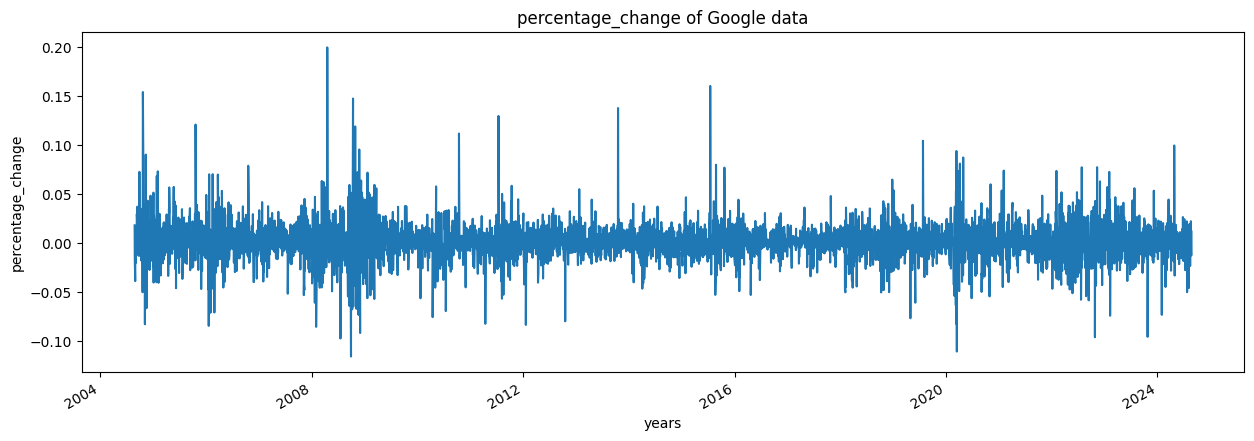

In [ ]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [ ]:
Adj_close_price = google_data[['Adj Close']]

In [ ]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.66000366]), array([2.48808169]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[7.83614035e-04],
       [1.03348276e-03],
       [8.03236951e-04],
       ...,
       [8.68382259e-01],
       [8.57129287e-01],
       [8.67330515e-01]])

In [ ]:
len(scaled_data)

5034

In [ ]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [ ]:
x_data[0],y_data[0]

(array([[7.83614035e-04],
        [1.03348276e-03],
        [8.03236951e-04],
        [2.61643473e-04],
        [3.08737468e-04],
        [3.13989218e-05],
        [1.96230411e-04],
        [0.00000000e+00],
        [2.05389945e-04],
        [2.99582949e-04],
        [3.00889305e-04],
        [6.95966599e-04],
        [9.79844446e-04],
        [1.50182002e-03],
        [1.56853693e-03],
        [1.82625131e-03],
        [2.28674167e-03],
        [2.53137368e-03],
        [2.33252680e-03],
        [2.40316654e-03],
        [2.72237366e-03],
        [2.59285890e-03],
        [2.38747397e-03],
        [3.51252574e-03],
        [4.06458761e-03],
        [3.87097242e-03],
        [4.26081802e-03],
        [4.58524931e-03],
        [5.01826483e-03],
        [4.84950926e-03],
        [5.08105766e-03],
        [4.93454147e-03],
        [4.61141654e-03],
        [4.89137156e-03],
        [5.34924043e-03],
        [5.49314139e-03],
        [5.76917233e-03],
        [6.42981593e-03],
        [6.2

In [ ]:

int(len(x_data)*0.7)

3453

In [ ]:
4908-100-int(len(x_data)*0.7)

1355

In [ ]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1481, 100, 1)
(1481, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 311s 89ms/step - loss: 3.9547e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 324s 90ms/step - loss: 5.9967e-05


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step


In [ ]:
predictions

array([[0.30574122],
       [0.30238906],
       [0.29801053],
       ...,
       [0.8609492 ],
       [0.8624446 ],
       [0.85618424]], dtype=float32)

In [ ]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 60.631477],
       [ 59.99399 ],
       [ 59.16132 ],
       ...,
       [166.21645 ],
       [166.50082 ],
       [165.31029 ]], dtype=float32)

In [ ]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 58.34310913],
       [ 57.80172348],
       [ 57.3832016 ],
       ...,
       [167.63000488],
       [165.49000549],
       [167.42999268]])

In [ ]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [ ]:
rmse

2.72450260354108

In [ ]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-10-04,58.343109,60.631477
2018-10-05,57.801723,59.993992
2018-10-08,57.383202,59.161320
2018-10-09,56.876278,58.441730
2018-10-10,53.999554,57.870705


<Figure size 640x480 with 0 Axes>

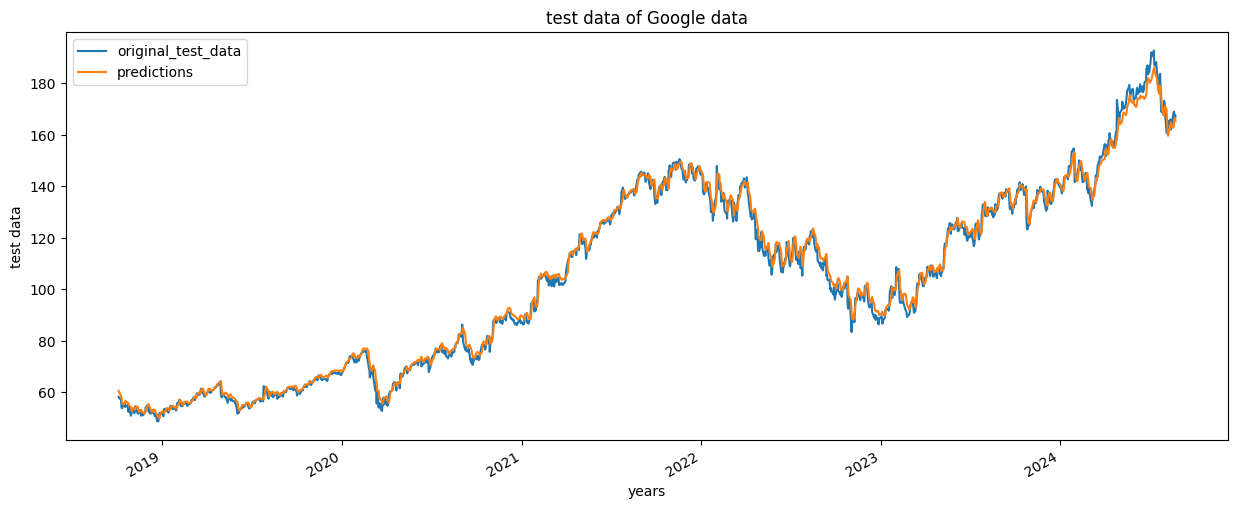

In [ ]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

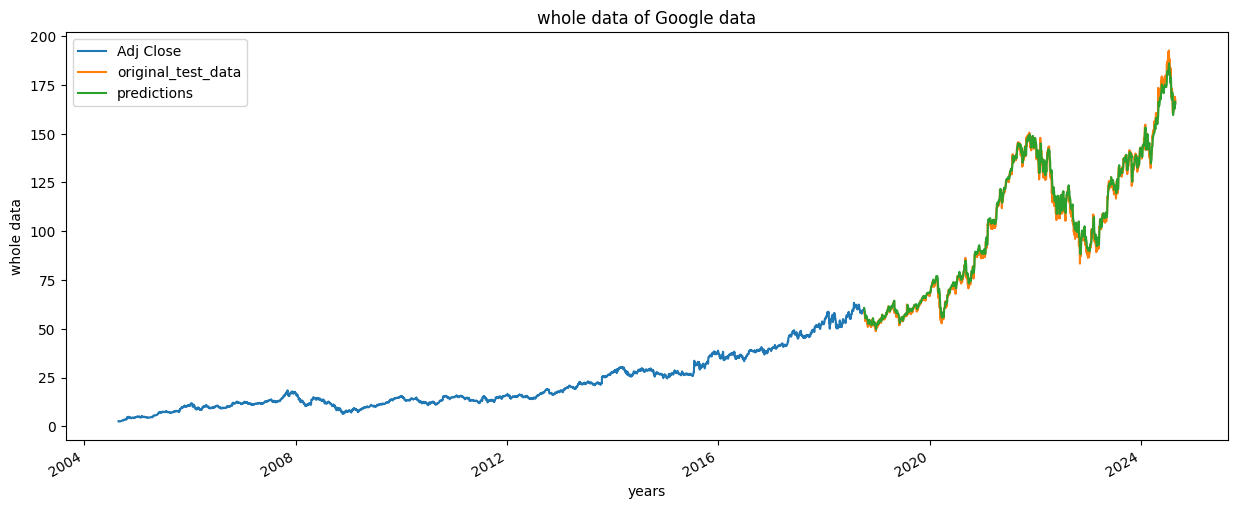

In [ ]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [ ]:
model.save("Latest_stock_price_model.keras")